# Advanced PyROA

Now that we've gone through the individual arguments in the PyROA module of pyPetal, we can use more complex arguments:

In [1]:
%matplotlib inline
import pypetal.pipeline as pl

main_dir = 'pypetal/examples/dat/javelin_'
line_names = ['continuum', 'yelm', 'zing']
filenames = [ main_dir + x + '.dat' for x in line_names ]

output_dir = 'pyroa_output4/'


Running PyROA
----------------
nburn: 6000
nchain: 10000
init_tau: [80, 150]
subtract_mean: False
div_mean: True
add_var: [False, True]
delay_dist: [True, True]
psi_types: ['InverseGauss', 'TruncGaussian']
together: False
objname: pyroa
----------------
        
Initial Parameter Values
      A0    B0        A1    B1    τ1    Δ1    Δ
--------  ----  --------  ----  ----  ----  ---
0.232527     1  0.233685     1    80     1   10
NWalkers=18


100%|██████████| 10000/10000 [13:04<00:00, 12.75it/s]


Filter: continuum
Mean Delay, error: 0.00 (fixed)
Filter: yelm
Mean Delay, error:  100.48133  (+   0.19901 -   0.20300)


Best Fit Parameters
      A0       B0        A1        B1       τ1       Δ1        Δ
--------  -------  --------  --------  -------  -------  -------
0.231393  1.00173  0.232697  0.996822  100.481  0.10985  5.00216
Initial Parameter Values
      A0    B0    σ0        A1    B1    τ1    Δ1    σ1    Δ
--------  ----  ----  --------  ----  ----  ----  ----  ---
0.232527     1  0.01  0.240196     1   150     1  0.01   10
NWalkers=22


100%|██████████| 10000/10000 [16:33<00:00, 10.06it/s]
/home/stone28/miniconda3/envs/pypetal_test/lib/python3.10/site-packages/PyROA/PyROA.py:620: RuntimeWarning: invalid value encountered in true_divide
  alpha = (a-mu)/rms


Filter: continuum
Mean Delay, error: 0.00 (fixed)
Filter: zing
Mean Delay, error:  250.58353  (+   1.05693 -   0.98519)


Best Fit Parameters
      A0        B0         σ0      A1       B1       τ1        Δ1         σ1        Δ
--------  --------  ---------  ------  -------  -------  --------  ---------  -------
0.230133  0.998632  0.0341347  0.2371  1.00094  250.584  0.499982  0.0340066  12.2658


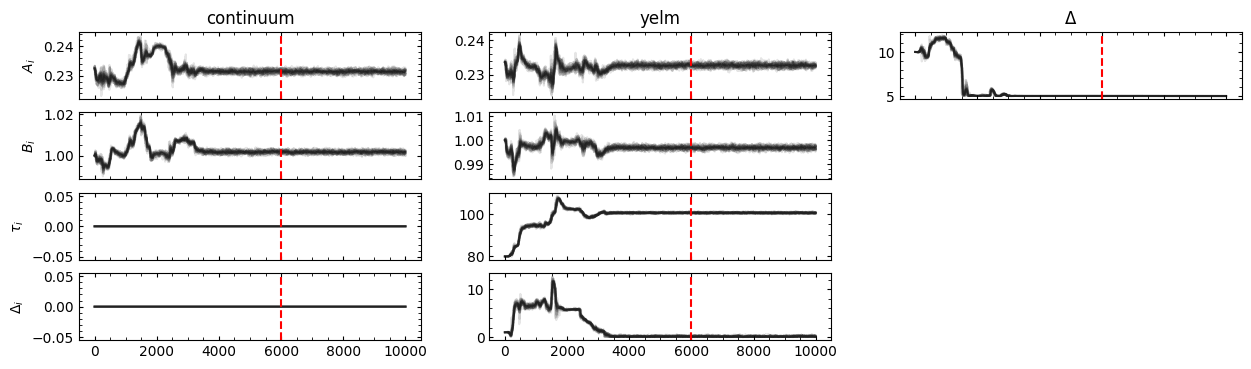

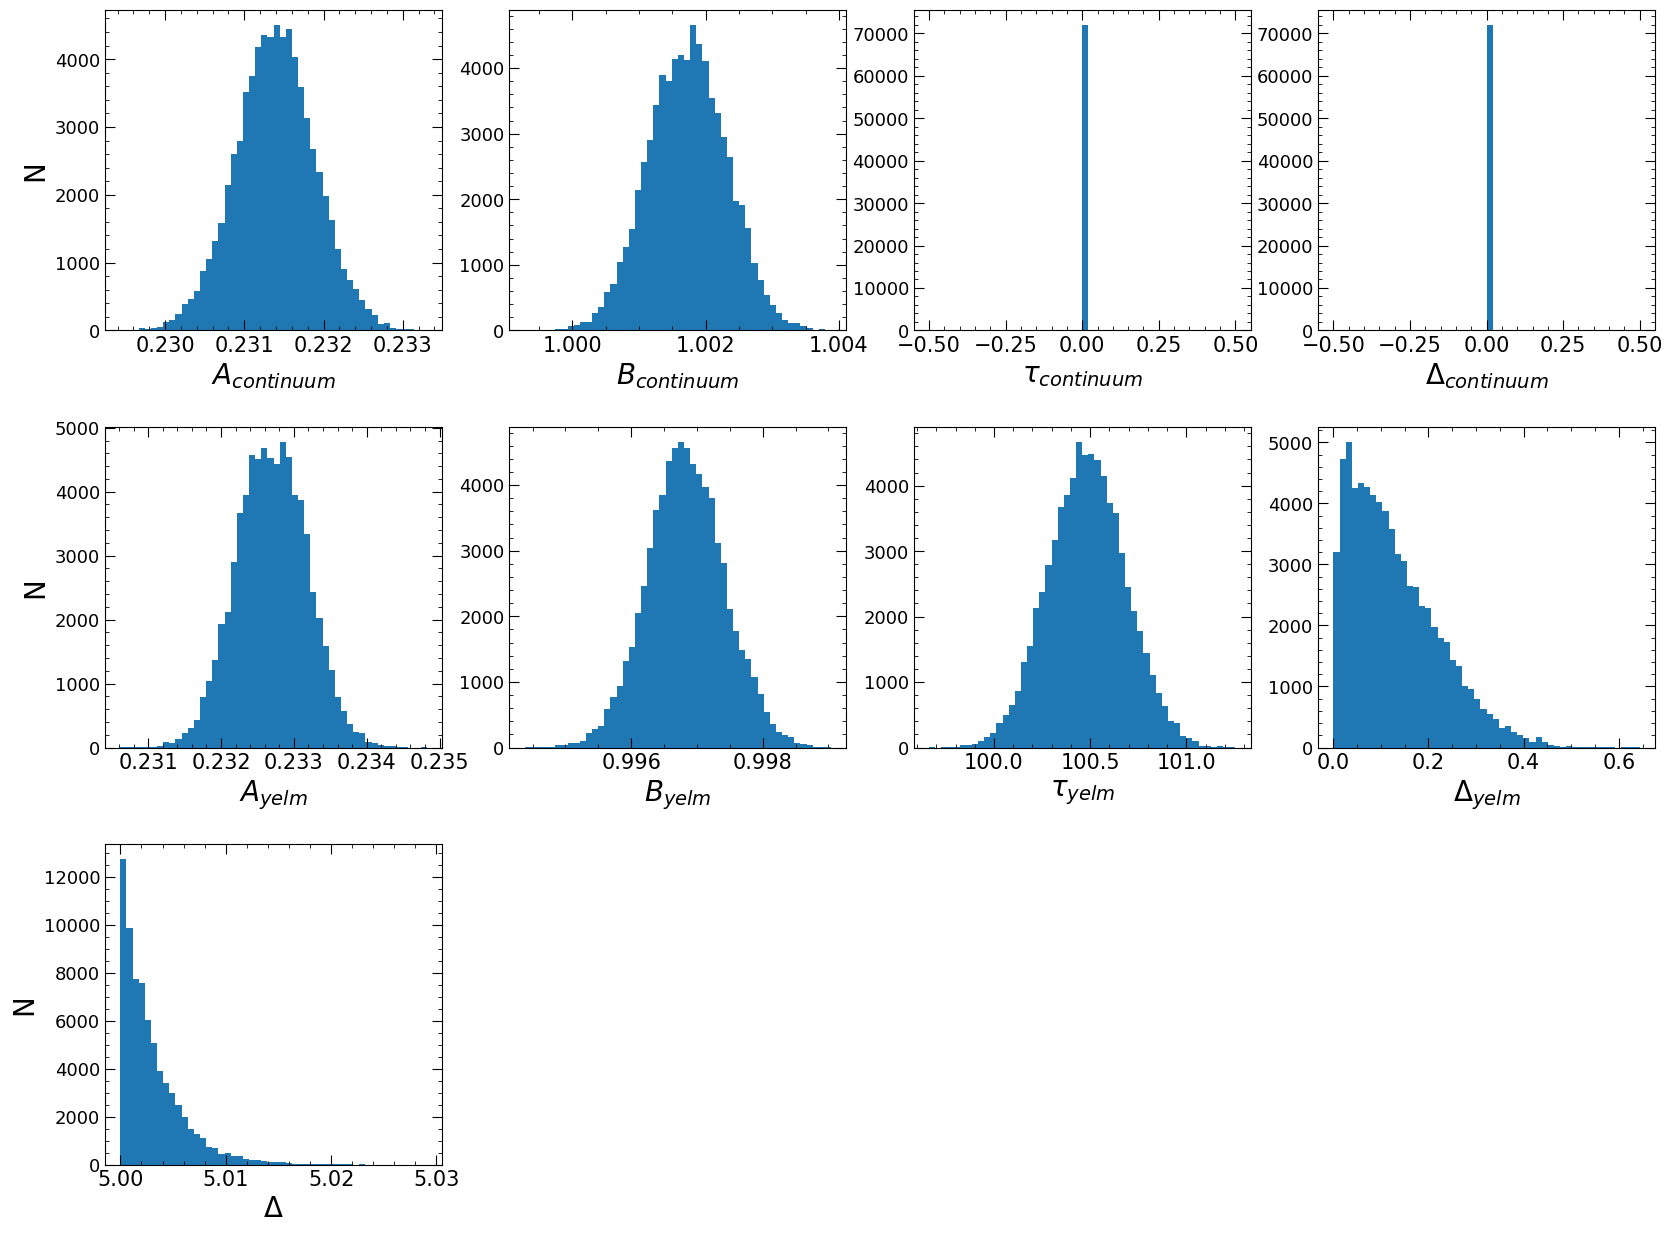

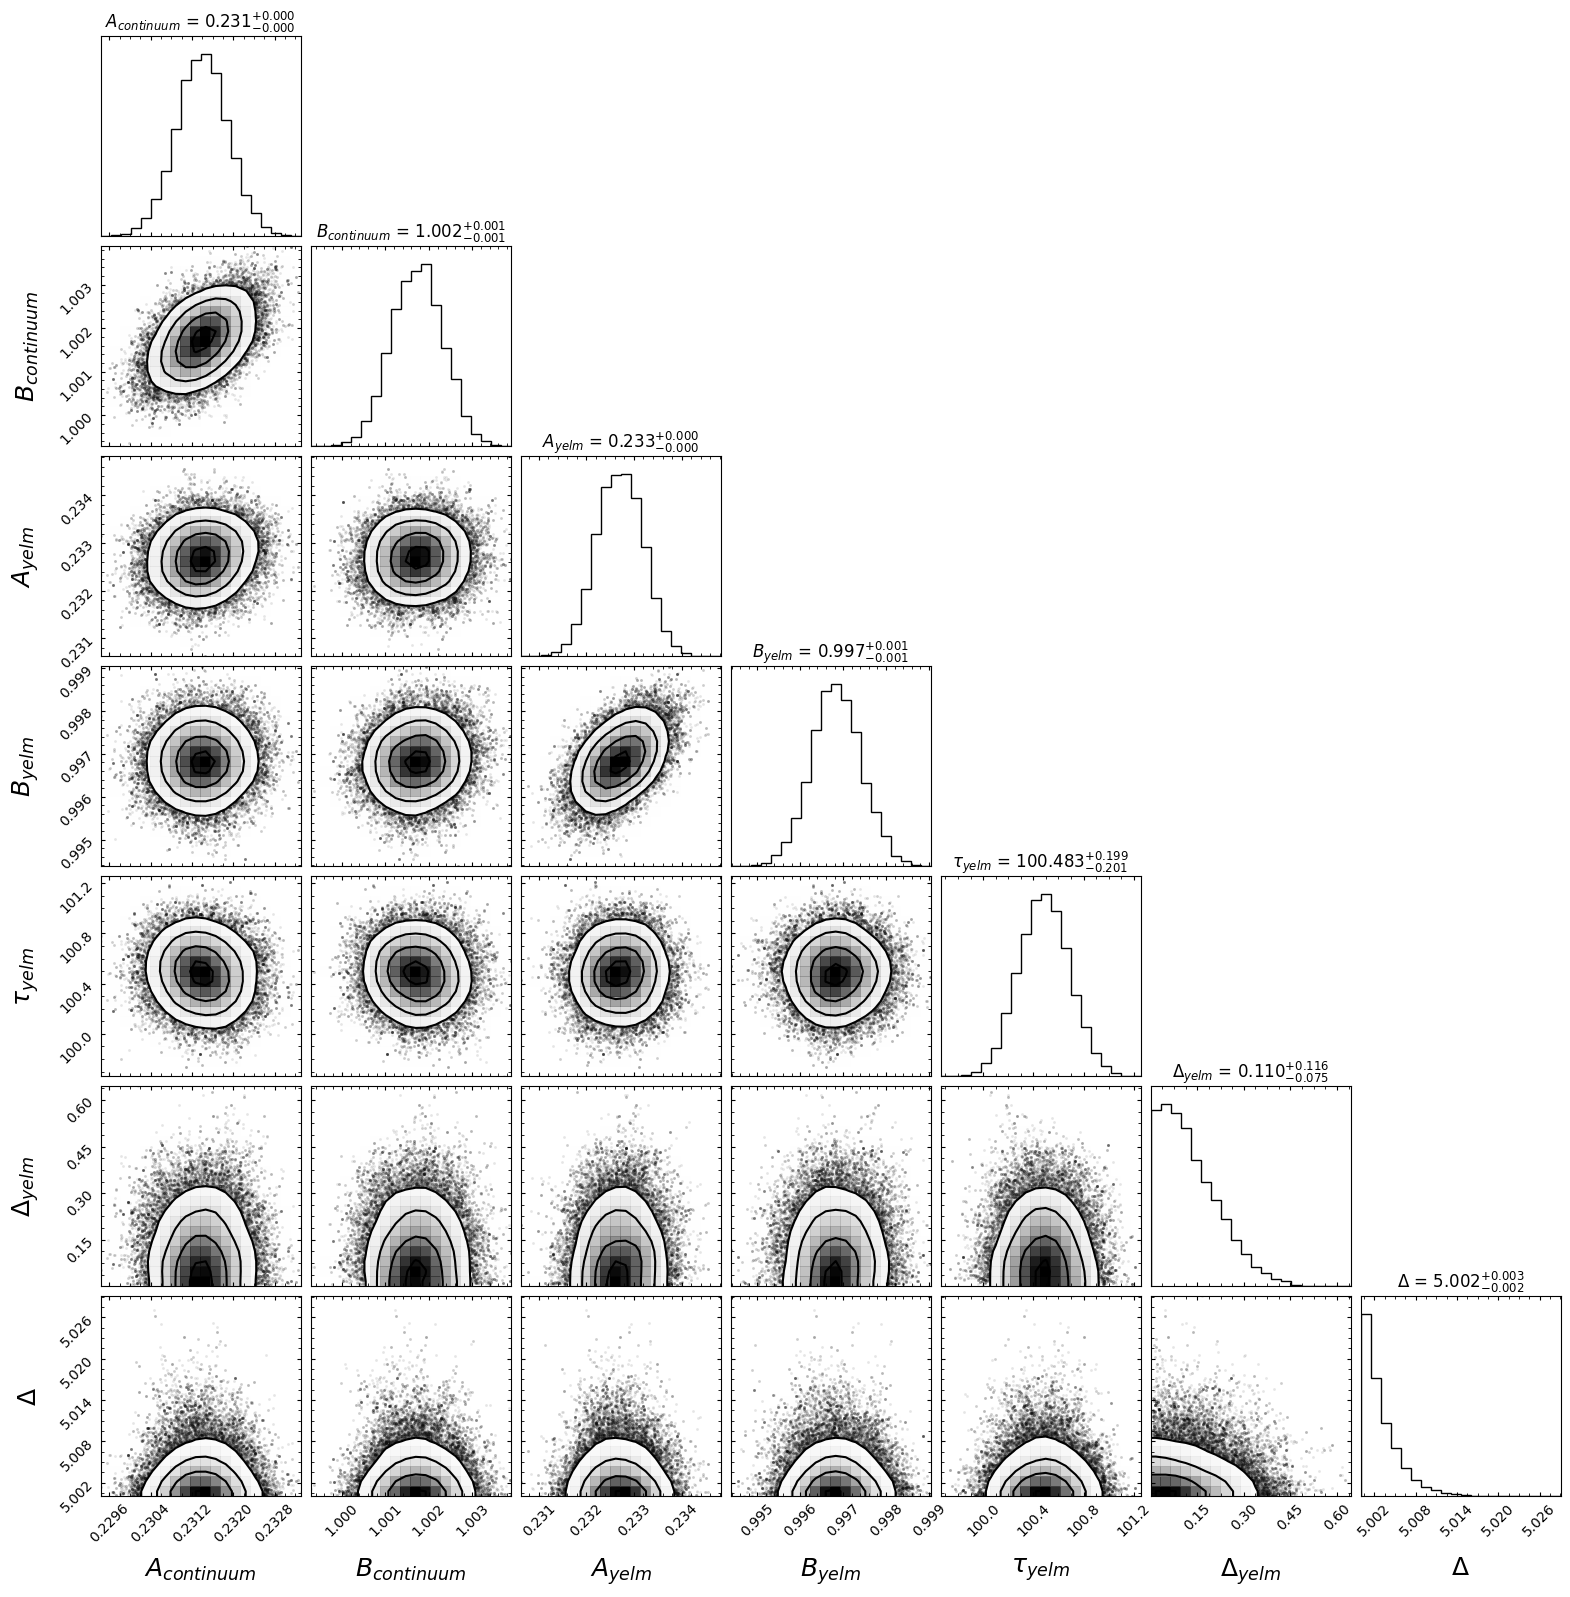

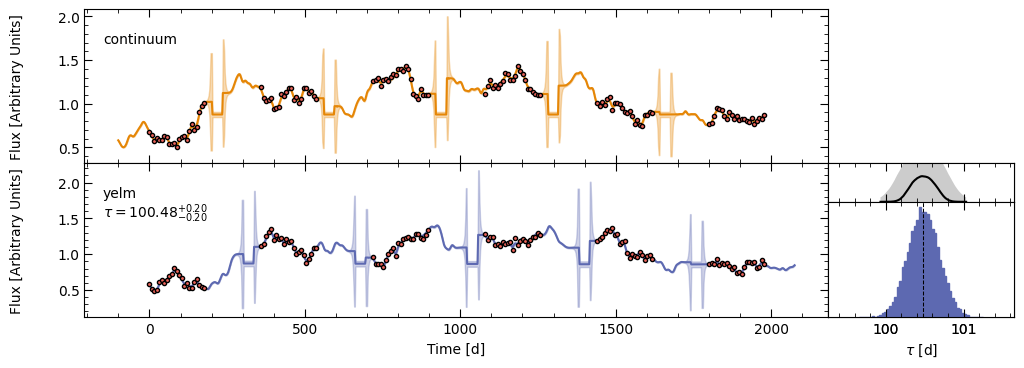

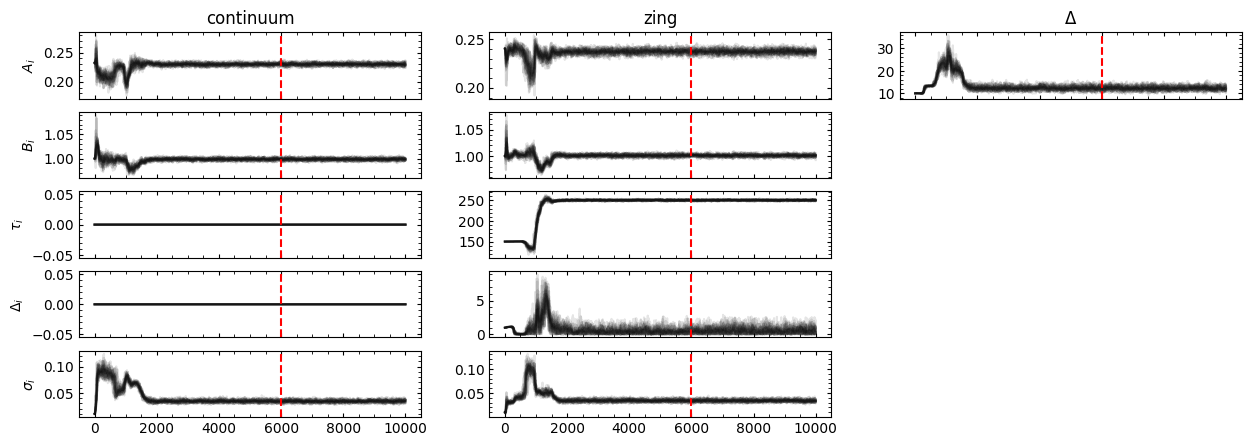

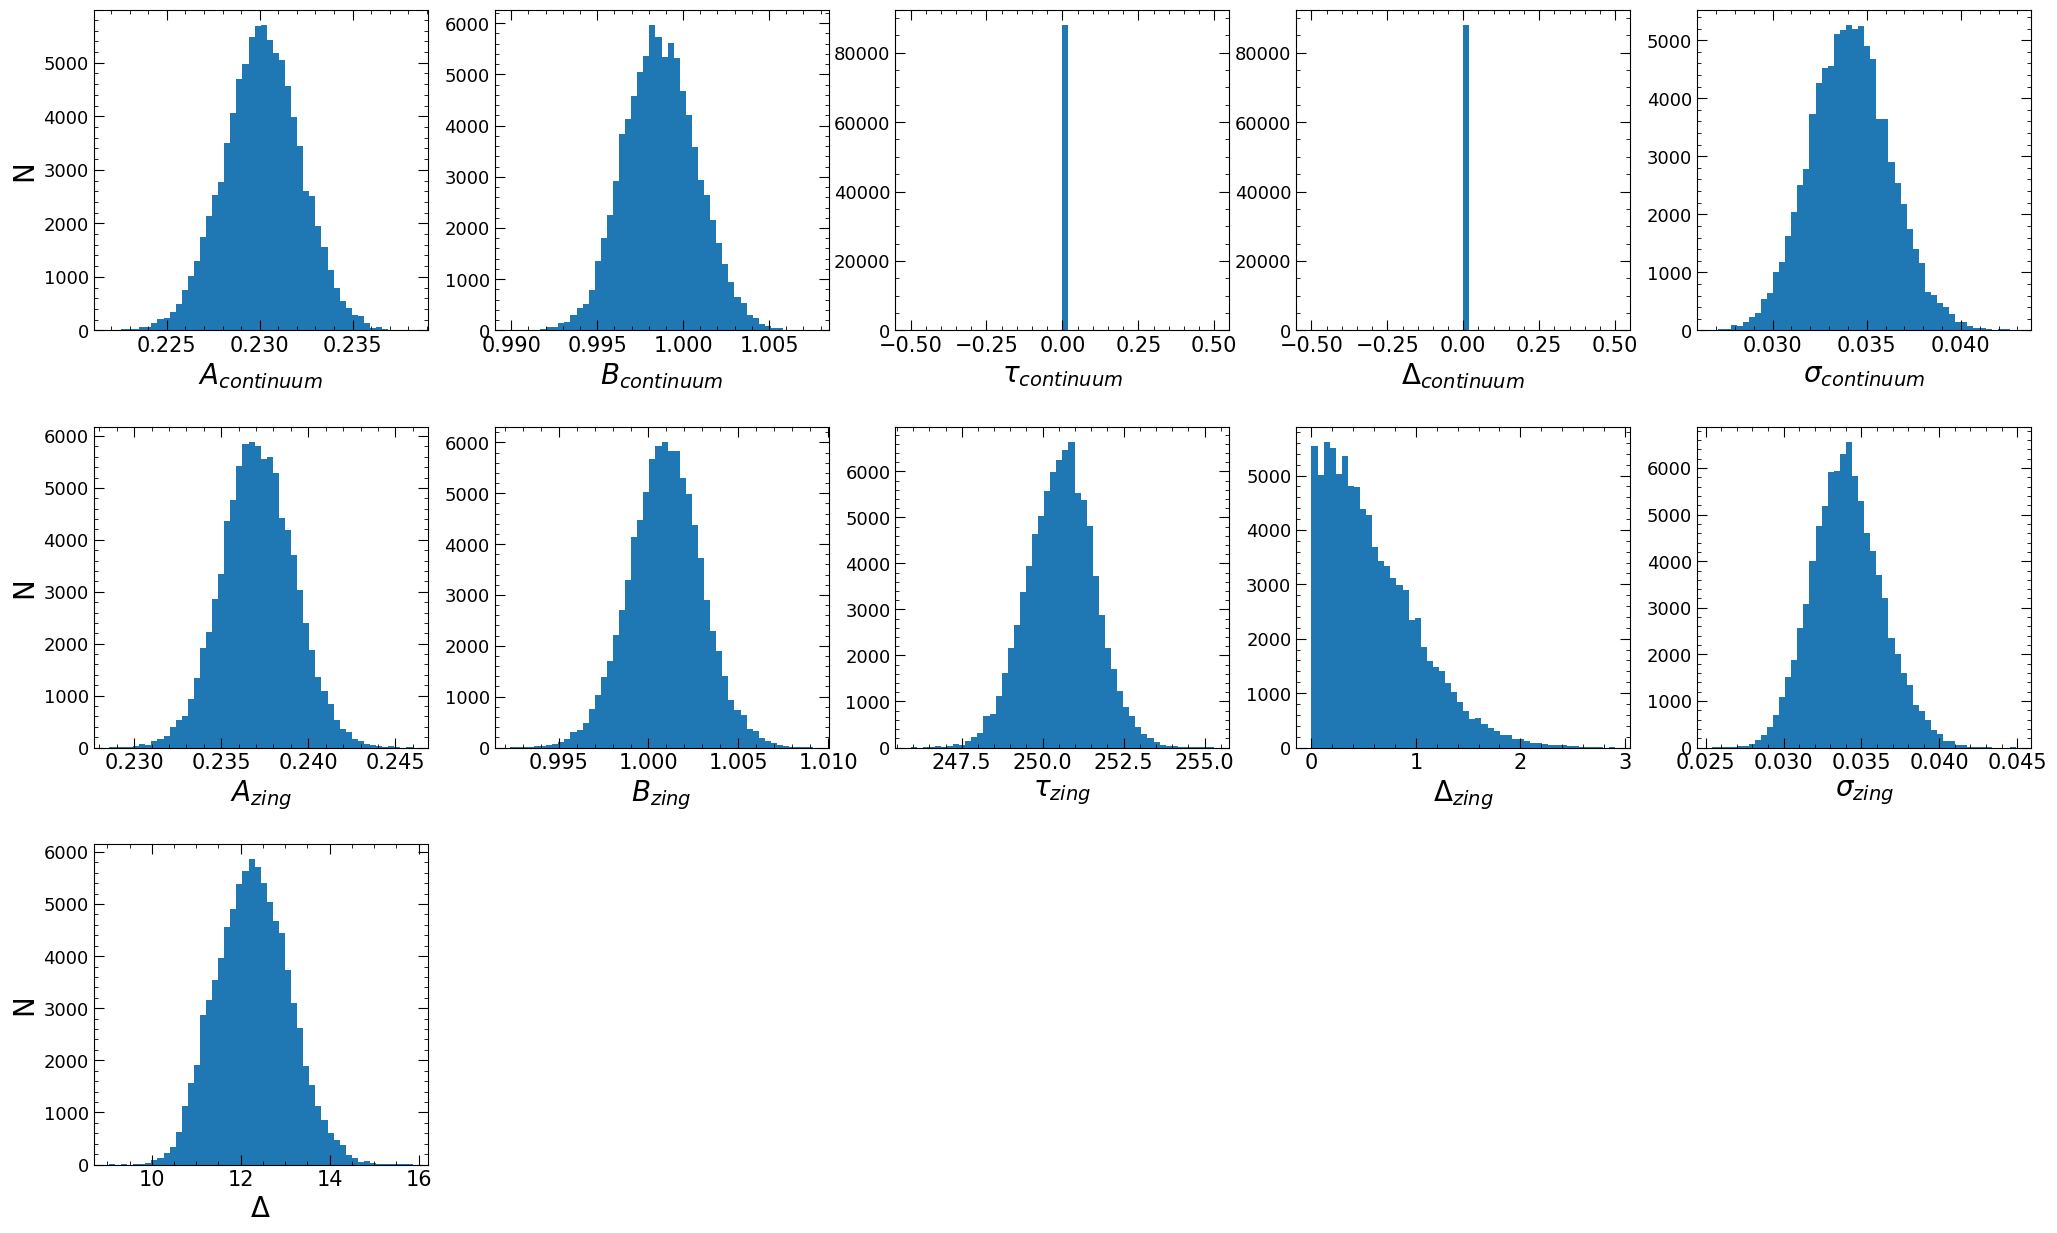

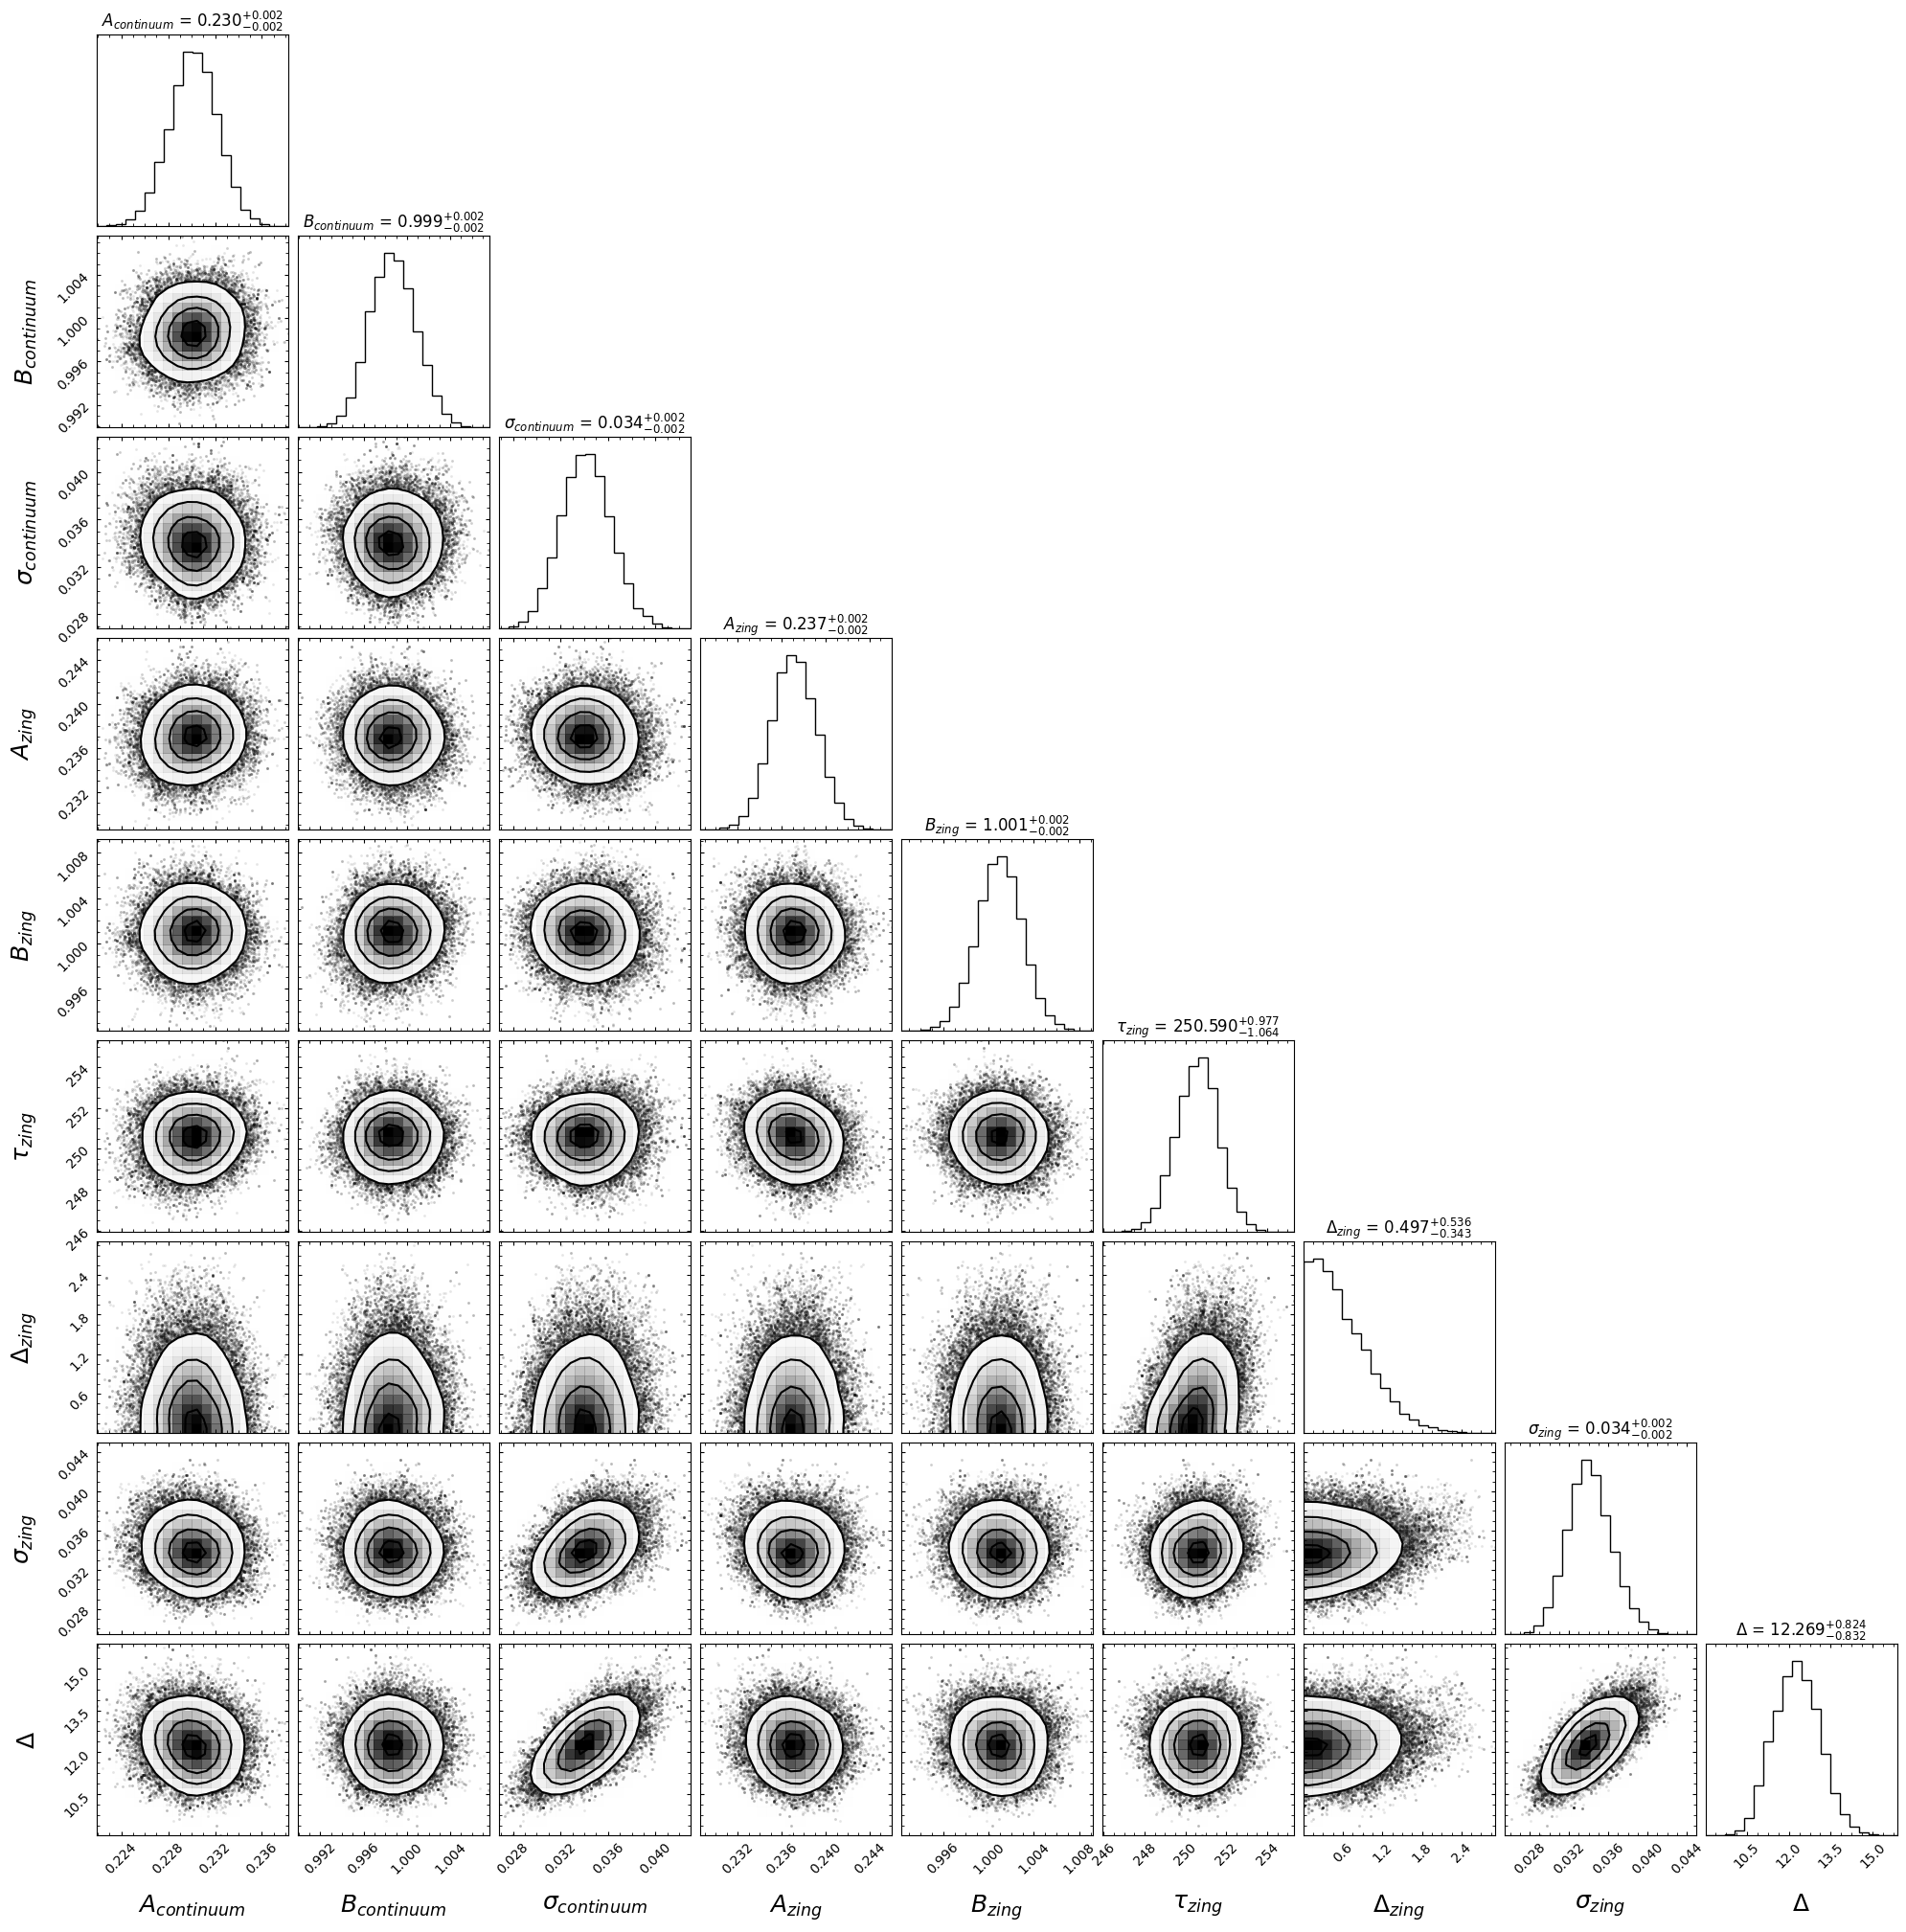

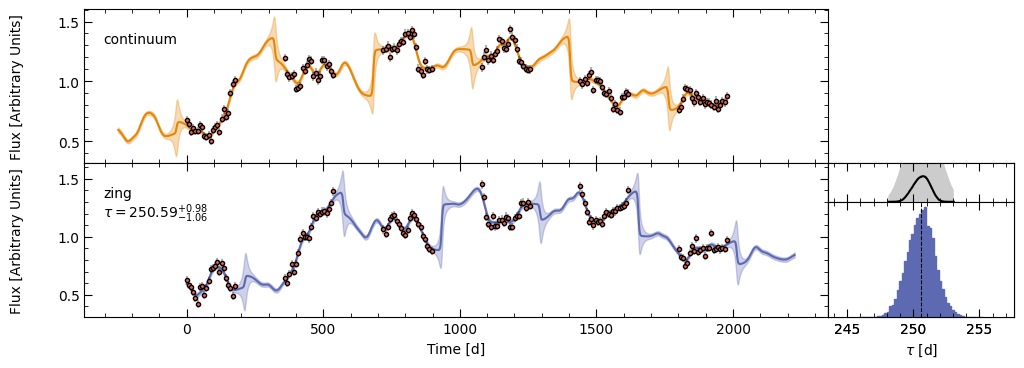

In [2]:
params = {
    'nchain': 10000,
    'nburn': 6000,
    'together': False,
    'subtract_mean': False,
    'div_mean': True,
    'add_var': [False, True],
    'delay_dist': True,
    'init_tau': [80, 150],
    'psi_types': ['InverseGauss', 'TruncGaussian'],
}
lag_bounds = [[0, 250], 'baseline']

res = pl.run_pipeline( output_dir, filenames, line_names,
                      run_pyroa=True, pyroa_params=params,
                      verbose=True, plot=True,
                      file_fmt='ascii', lag_bounds=lag_bounds)

This will have MCMC samples chunked in the following order:

yelm - $[[A_0, B_0, \tau_0, \Delta_0],[A_1, B_1, \tau_1, \Delta_1],[\Delta]]$

zing - $[[A_0, B_0, \tau_0, \Delta_0, \sigma_0],[A_1, B_1, \tau_1, \Delta_1, \sigma_1],[\Delta]]$

where $\tau_0$ and $\Delta_0$ are arrays of 0s.